In [8]:
import math
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import layers
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np

In [9]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [10]:
selected_X = []
selected_y = []

num_examples_per_class = 100  # Number of examples per class
num_classes = 10  # Total number of classes

for class_label in range(num_classes):
    class_indices = np.where(Y_train == class_label)[0]
    selected_indices = np.random.choice(class_indices, num_examples_per_class, replace=False)

    selected_X.extend(X_train[selected_indices])
    selected_y.extend(Y_train[selected_indices])

selected_X = np.array(selected_X)
selected_y = np.array(selected_y)


In [11]:
y_train_few = to_categorical(selected_y, num_classes=10)
X_train_few = selected_X

In [12]:
y_train = to_categorical(Y_train, num_classes=10)
y_test = to_categorical(Y_test, num_classes=10)

In [13]:
def identity_block(X, f, filters):
  # Save the input value. You'll need this later to add back to the main path.
  X_shortcut = X
  F1, F2 = filters

  X = Conv2D(filters = F1, kernel_size = (f, f), strides = (1,1), padding = 'same', kernel_initializer = glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis = 3)(X)
  X = Activation('relu')(X)


  X = Conv2D(filters = F2, kernel_size = (f,f), strides = (1,1), padding = 'same', kernel_initializer = glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis = 3)(X)

  X = layers.Add()([X, X_shortcut])
  X = Activation('relu')(X)
  return X



In [14]:
def convolutional_block(X, f, filters, s = 2):
  F1, F2 = filters
  X_shortcut = X




  X = Conv2D(F1, (1, 1), strides = (s,s), kernel_initializer = glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis = 3)(X)
  X = Activation('relu')(X)


  X = Conv2D(filters = F2, kernel_size = (f,f), strides = (1,1), padding = 'same', kernel_initializer = glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis = 3)(X)

  X_shortcut = Conv2D(F2, (1, 1), strides = (s,s),  kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
  X_shortcut = BatchNormalization(axis = 3)(X_shortcut)

  X = layers.Add()([X, X_shortcut])
  X = Activation('relu')(X)
  return X

In [15]:
def ResNet18(input_shape = (32, 32, 3), classes = 10):
  X_input = Input(input_shape)
  X = ZeroPadding2D((3, 3))(X_input)


  X = Conv2D(64, (7, 7), strides = (2, 2), kernel_initializer = glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis = 3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((3, 3), strides=(2, 2))(X)

  X = identity_block(X, 3, [64, 64])
  X = identity_block(X, 3, [64, 64])


  X = convolutional_block(X, f = 3, filters = [128, 128 ], s = 1)
  X = identity_block(X, 3, [128, 128])

  X = convolutional_block(X, f = 3, filters = [256, 256 ], s = 1)
  X = identity_block(X, 3, [256, 256])

  X = convolutional_block(X, f = 3, filters = [512, 512 ], s = 1)
  X = identity_block(X, 3, [512,512])


  X = AveragePooling2D((2,2))(X)


  X = Flatten()(X)
  X = Dense(classes, activation='softmax', kernel_initializer = glorot_uniform(seed=0))(X)

  model = Model(inputs = X_input, outputs = X)

  return model

In [16]:
model = ResNet18(input_shape = ( 32, 32, 3), classes = 10)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 16, 16, 64)   9472        ['zero_padding2d[0][0]']         
                                                                                                  
 batch_normalization (BatchNorm  (None, 16, 16, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                   

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train_few, y_train_few, batch_size = 32, epochs=20)

Epoch 1/20
32/32 [==============================] - 84s 2s/step - loss: 4.1700 - accuracy: 0.1710
Epoch 2/20
32/32 [==============================] - 73s 2s/step - loss: 2.0177 - accuracy: 0.2900
Epoch 3/20
32/32 [==============================] - 75s 2s/step - loss: 1.8171 - accuracy: 0.3550
Epoch 4/20
32/32 [==============================] - 76s 2s/step - loss: 1.6242 - accuracy: 0.4140
Epoch 5/20
32/32 [==============================] - 75s 2s/step - loss: 1.4252 - accuracy: 0.4840
Epoch 6/20
32/32 [==============================] - 79s 2s/step - loss: 1.1745 - accuracy: 0.6150
Epoch 7/20
32/32 [==============================] - 76s 2s/step - loss: 1.1385 - accuracy: 0.5950
Epoch 8/20
32/32 [==============================] - 82s 3s/step - loss: 0.9259 - accuracy: 0.6640
Epoch 9/20
32/32 [==============================] - 81s 3s/step - loss: 0.7610 - accuracy: 0.7470
Epoch 10/20
32/32 [==============================] - 84s 3s/step - loss: 0.6256 - accuracy: 0.7920
Epoch 11/20
32/32 [

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 179s 570ms/step - loss: 3.6868 - accuracy: 0.3633


[3.686797618865967, 0.36329999566078186]

In [27]:
model.save('my_model.h5')

In [21]:
import tensorflow as tf
from keras import models

In [22]:
img = X_test[99]
img = np.expand_dims(img, axis = 0)
print(img.shape)

(1, 32, 32, 3)


In [23]:
layer_outputs = [layer.output for layer in  model.layers]
kernal_model = models.Model(inputs = model.input, outputs = layer_outputs)
new_output = kernal_model.predict(img)

1/1 [==============================] - 1s 542ms/step


(1, 7, 7, 64)


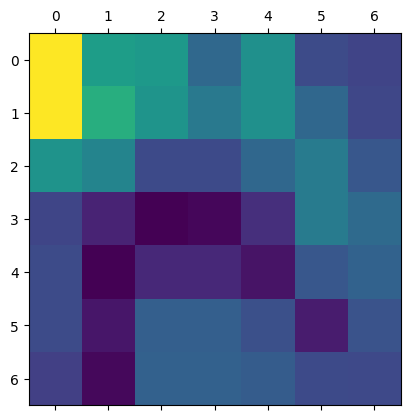

In [24]:
first_layer_output =new_output[5]
print(first_layer_output.shape)
plt.matshow(first_layer_output[0, :, :, 20], cmap ='viridis')

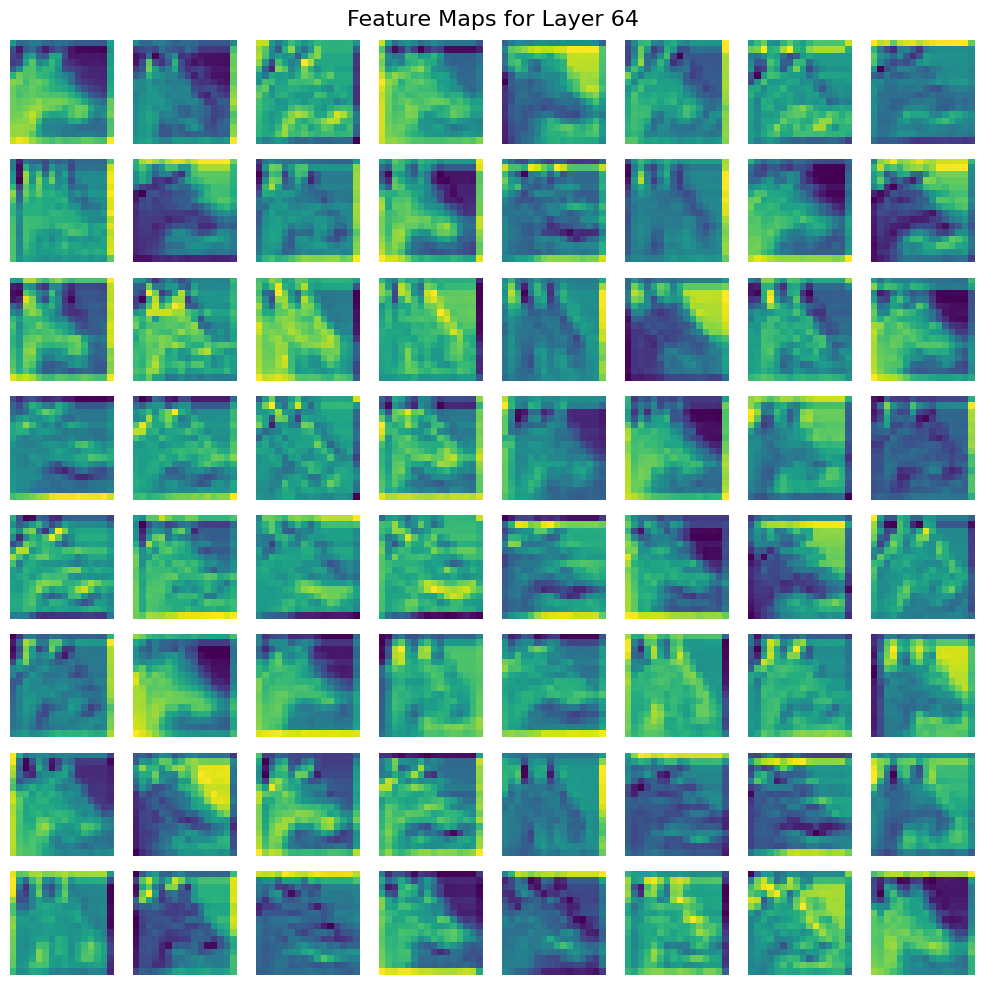

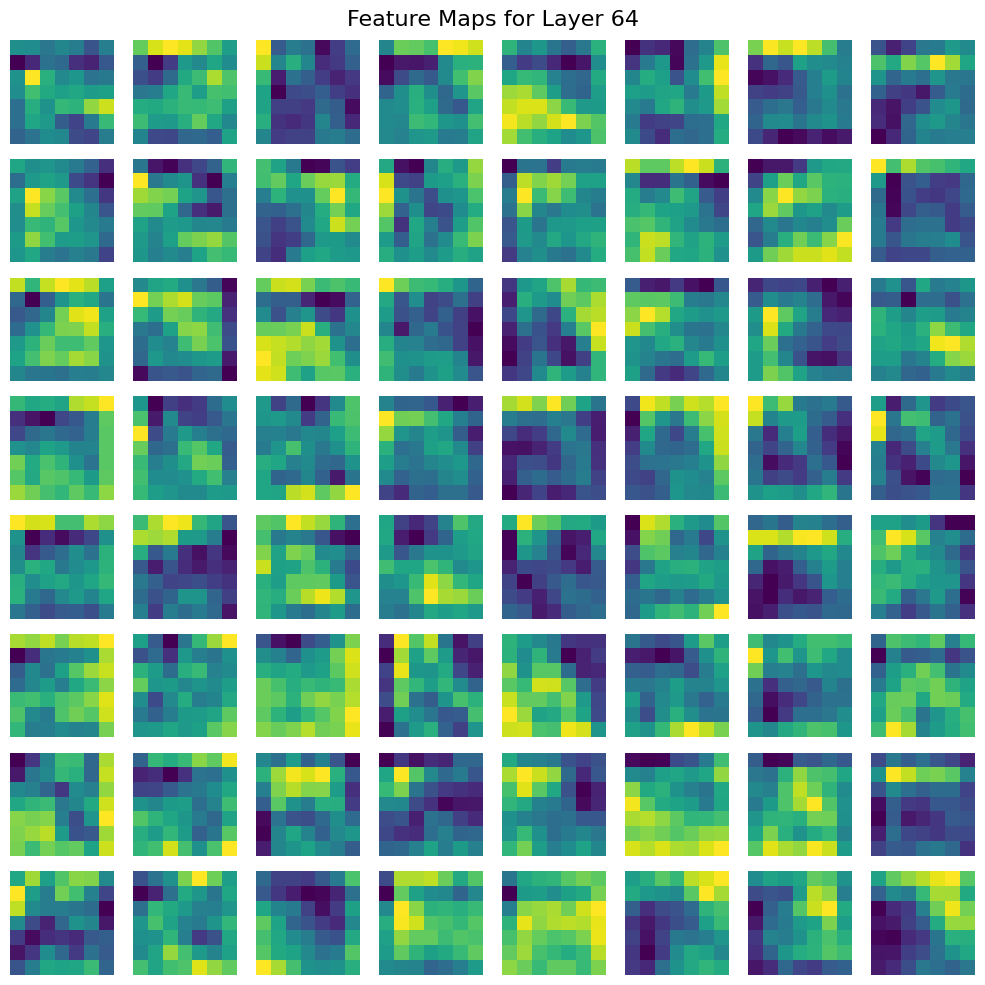

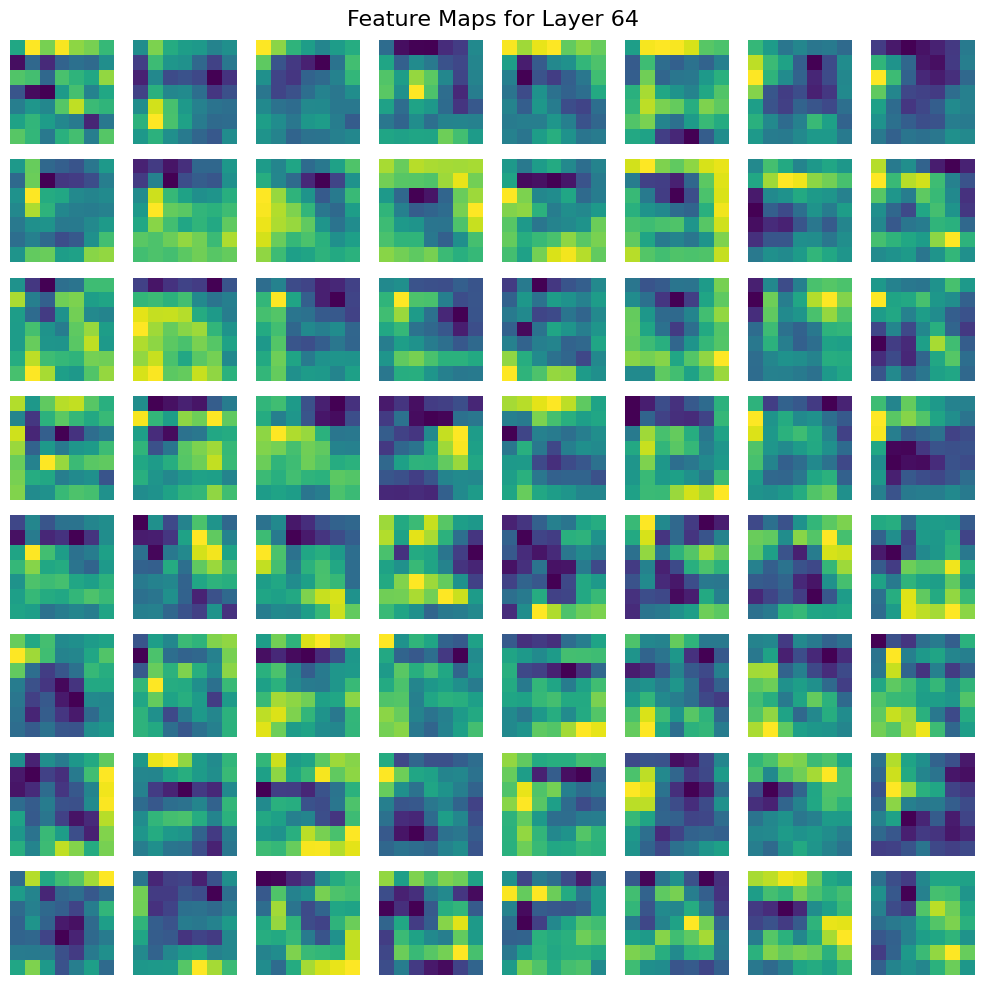

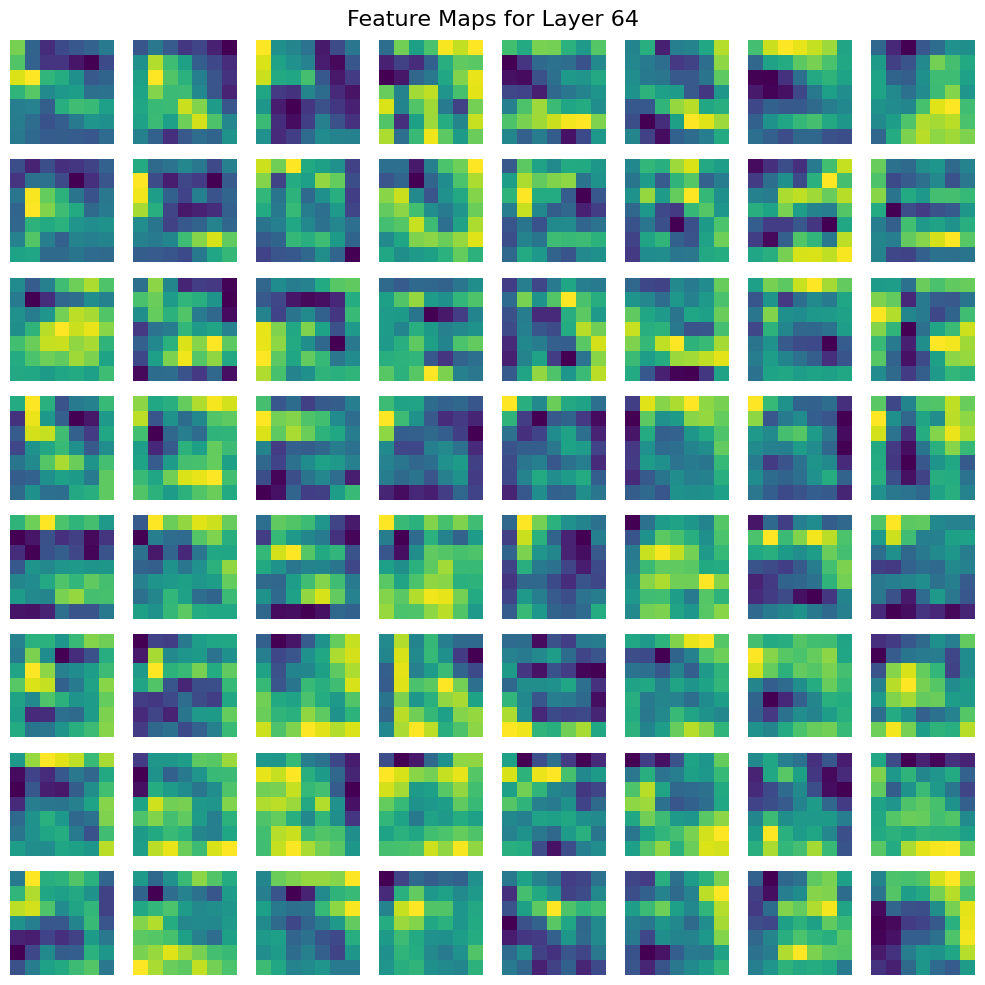

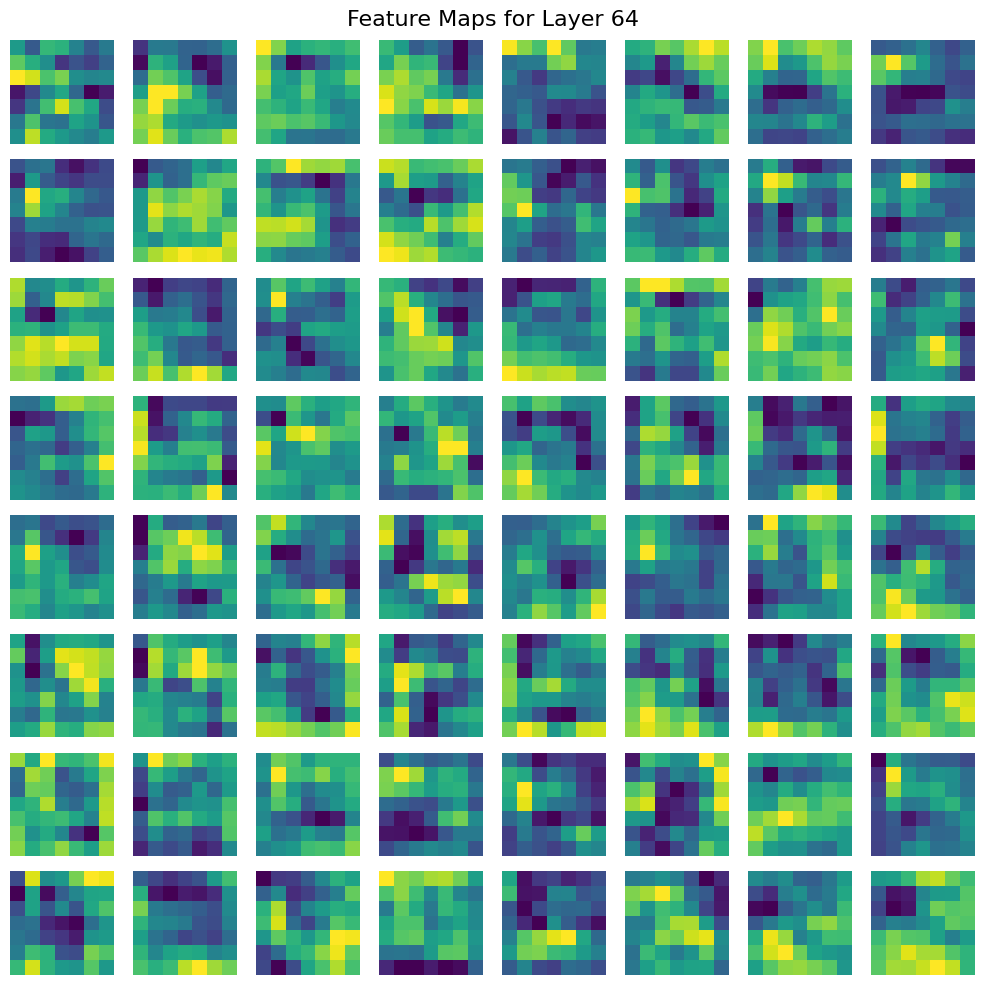

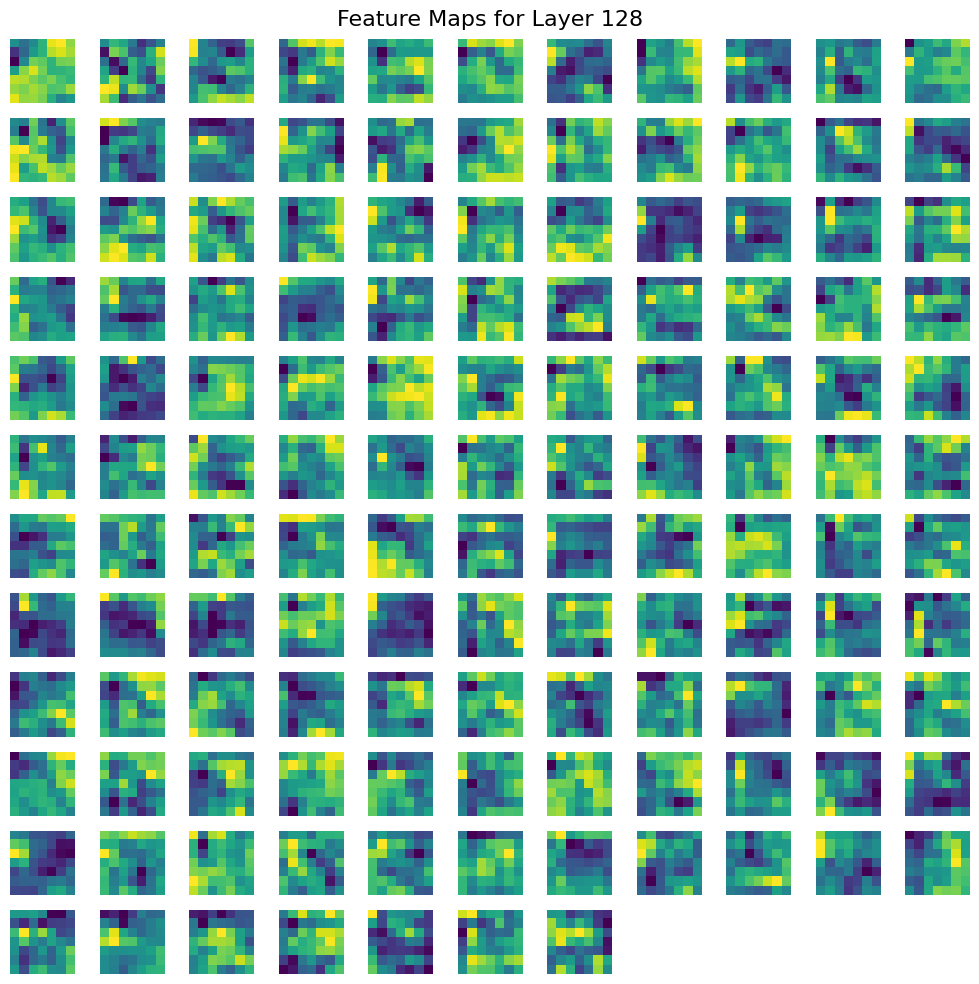

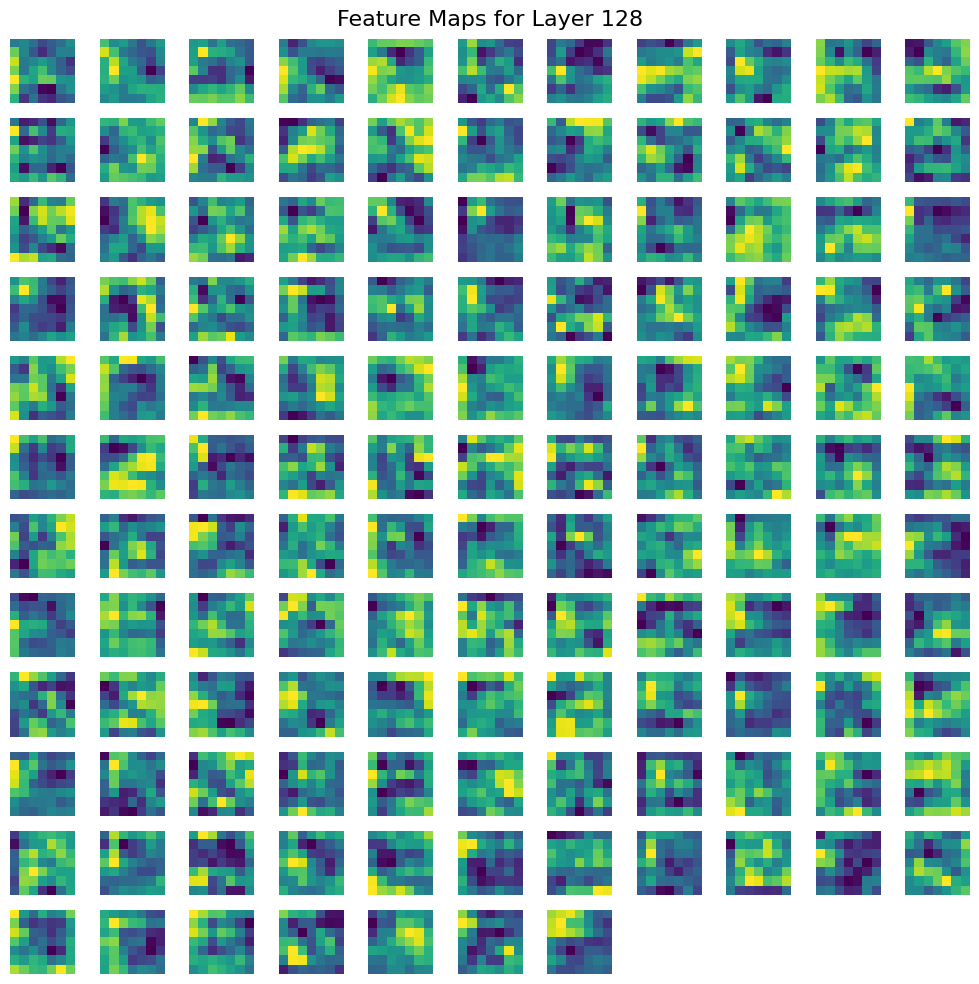

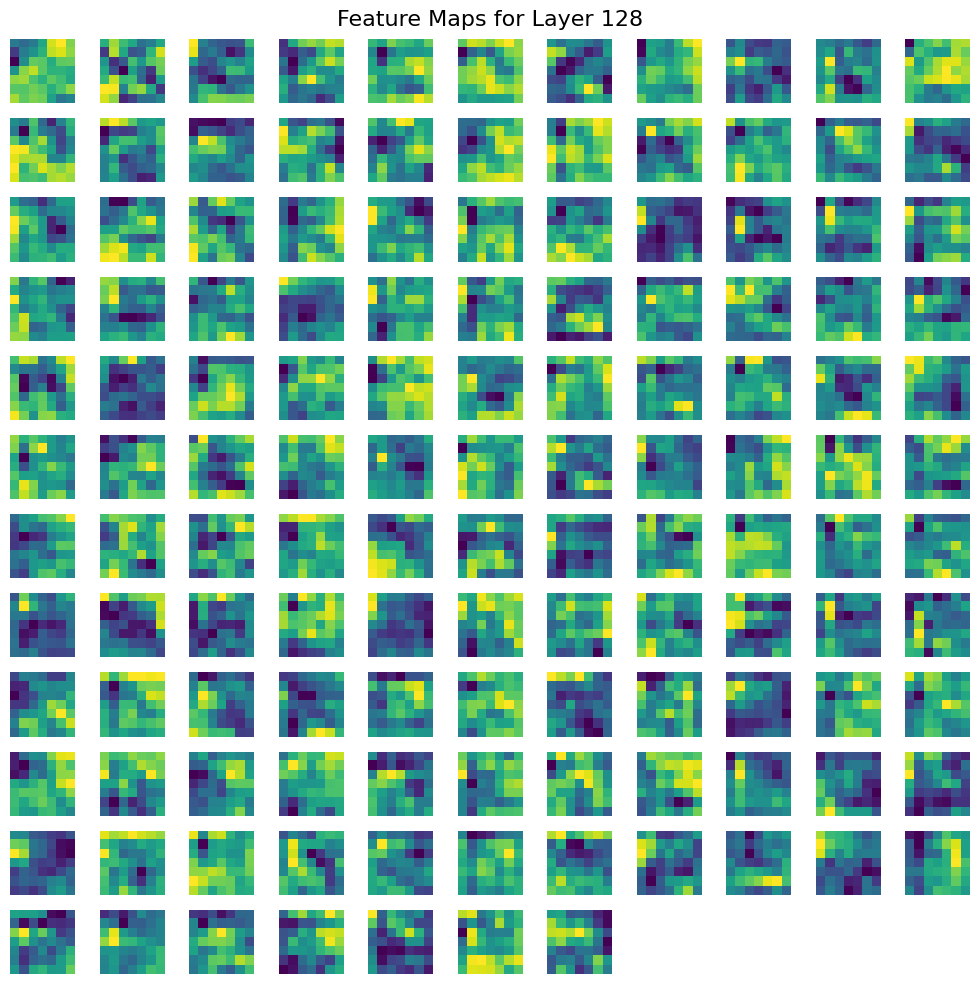

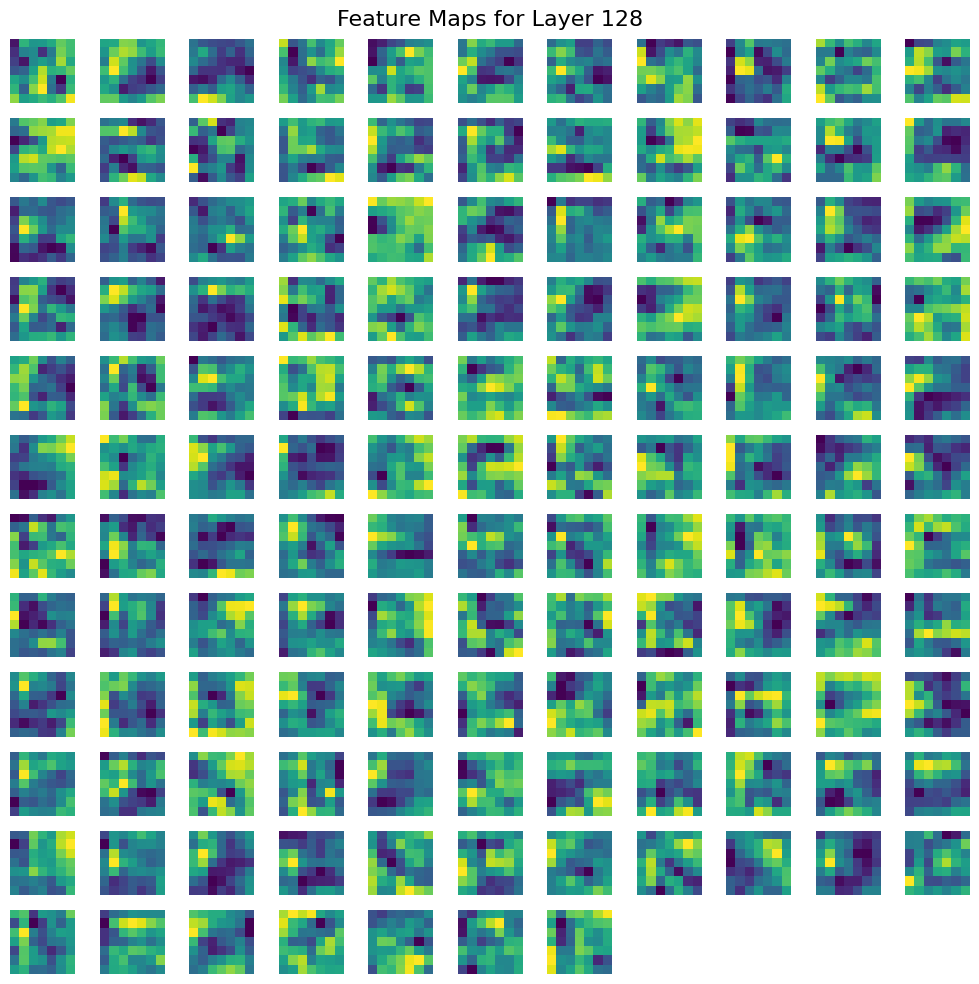

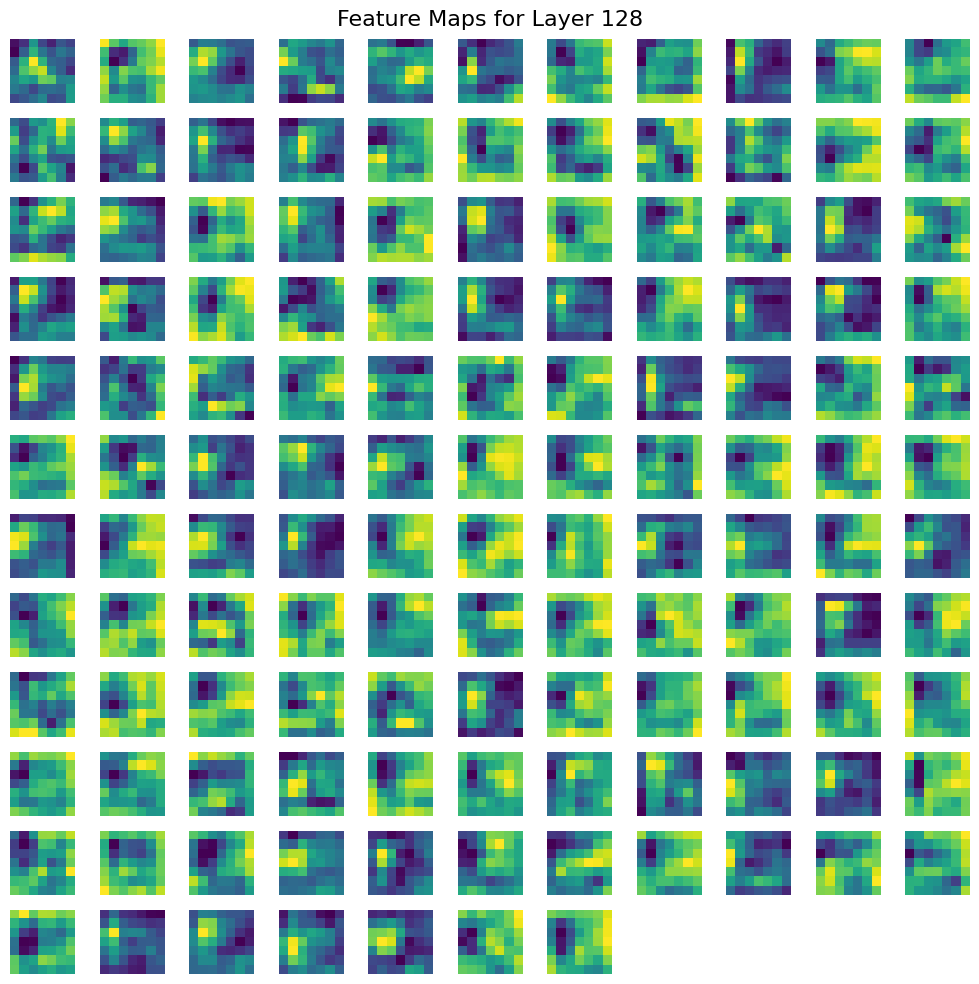

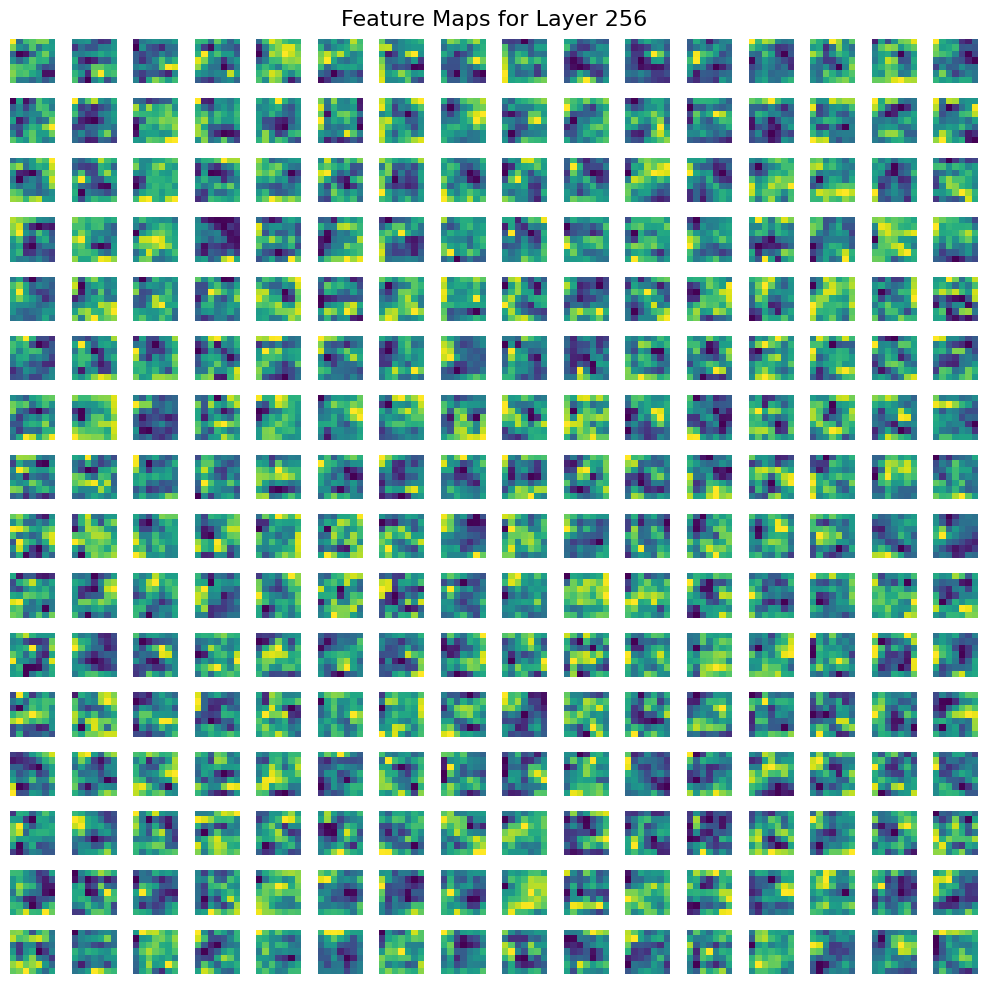

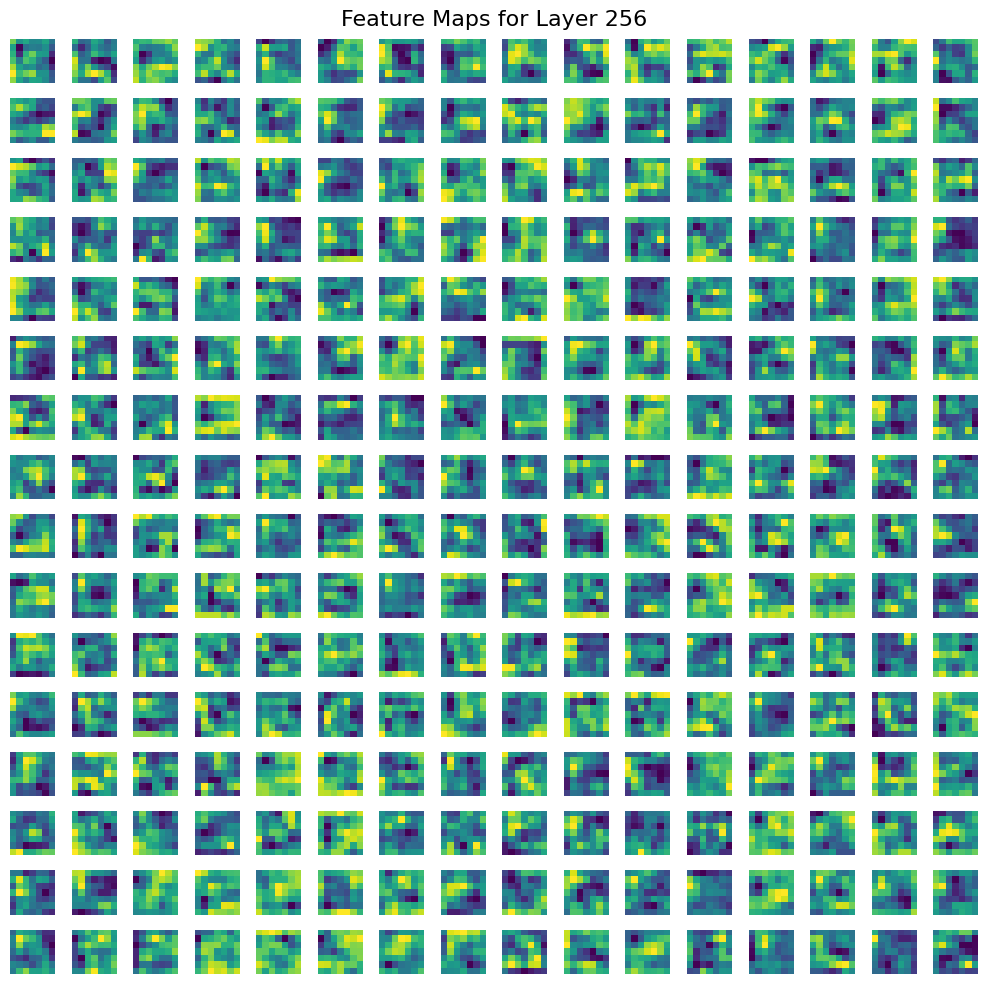

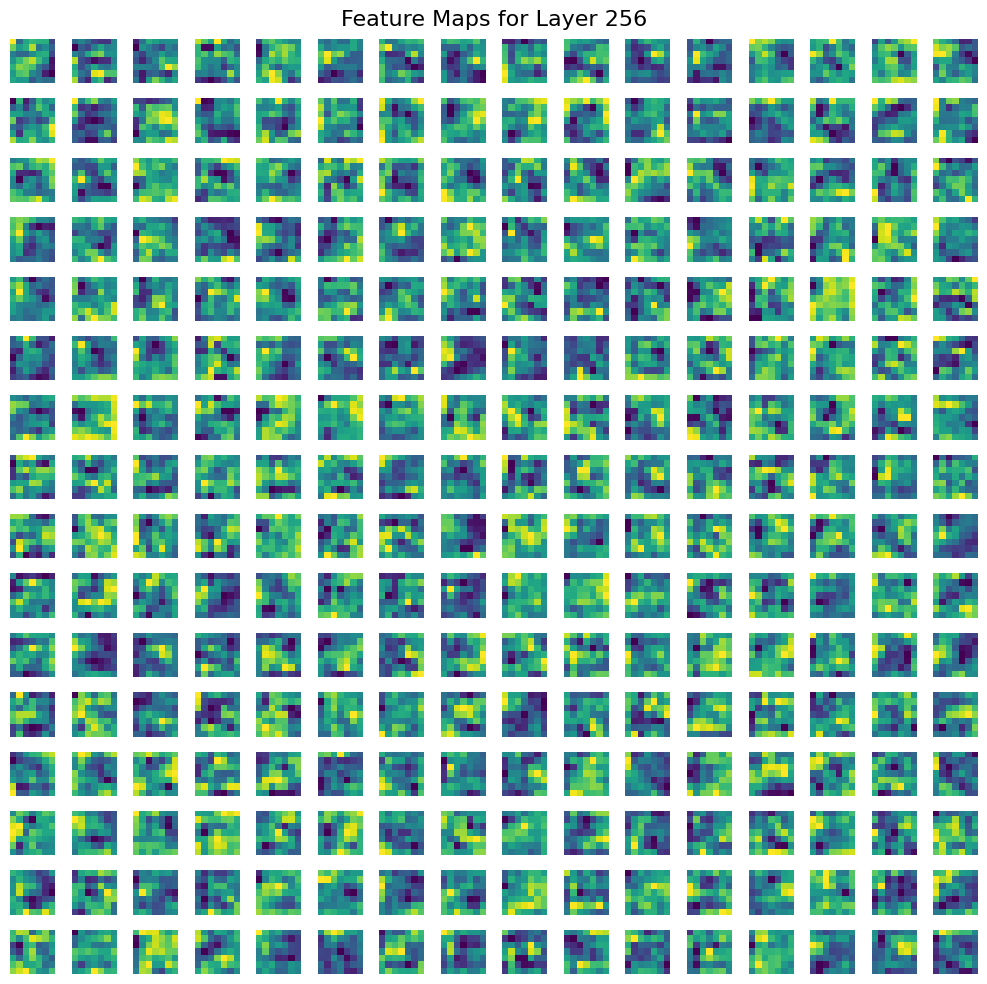

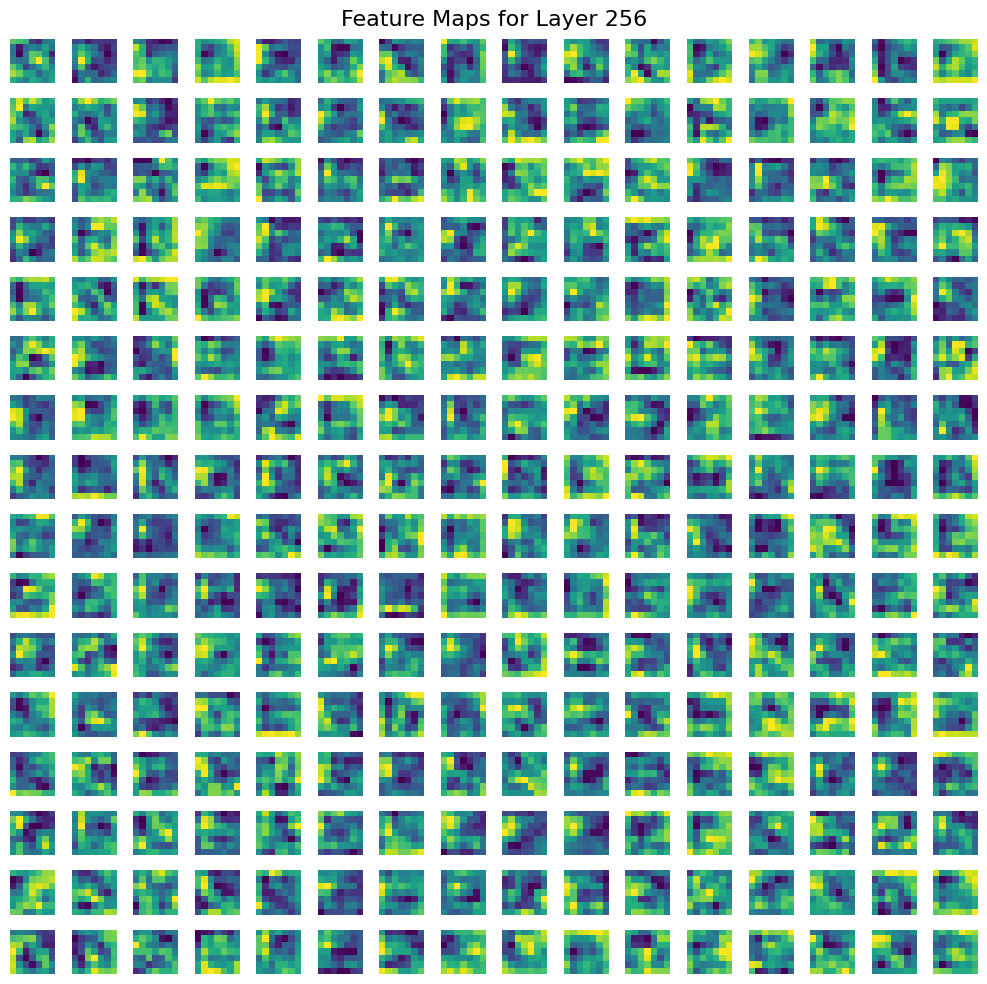

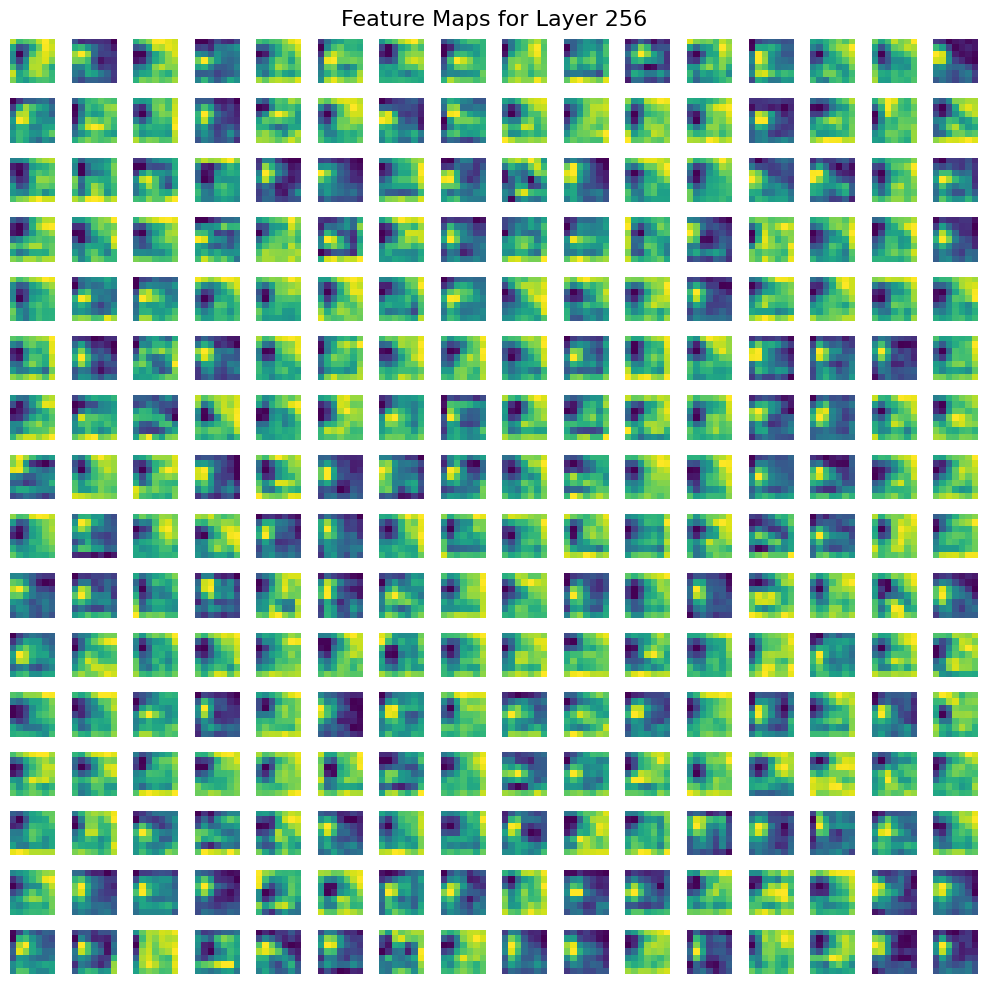

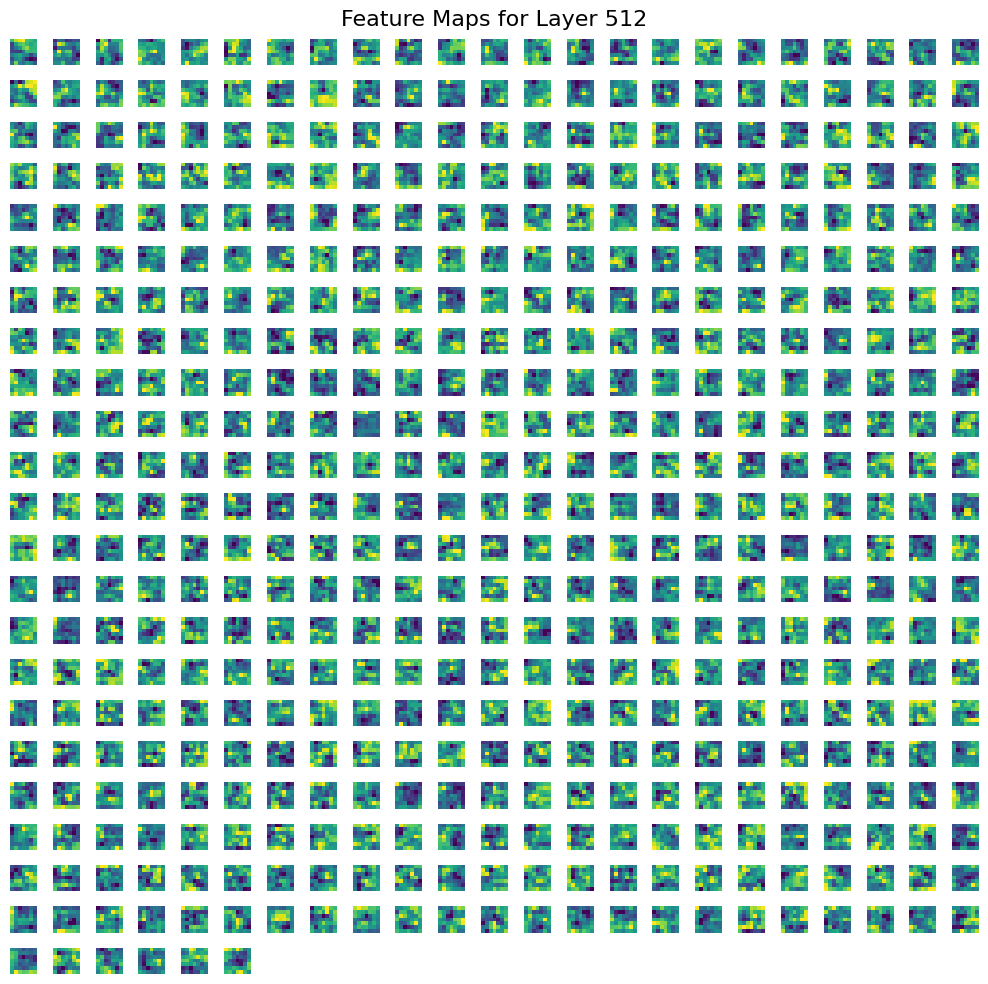

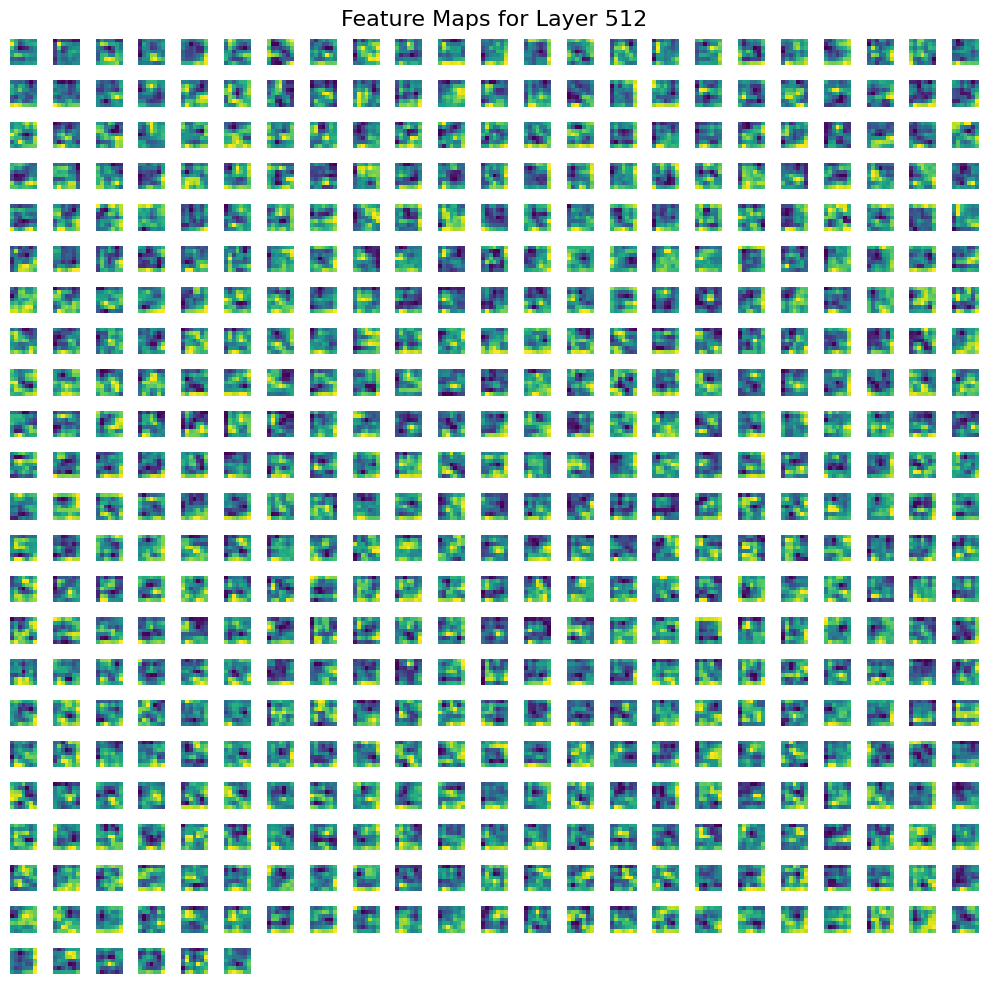

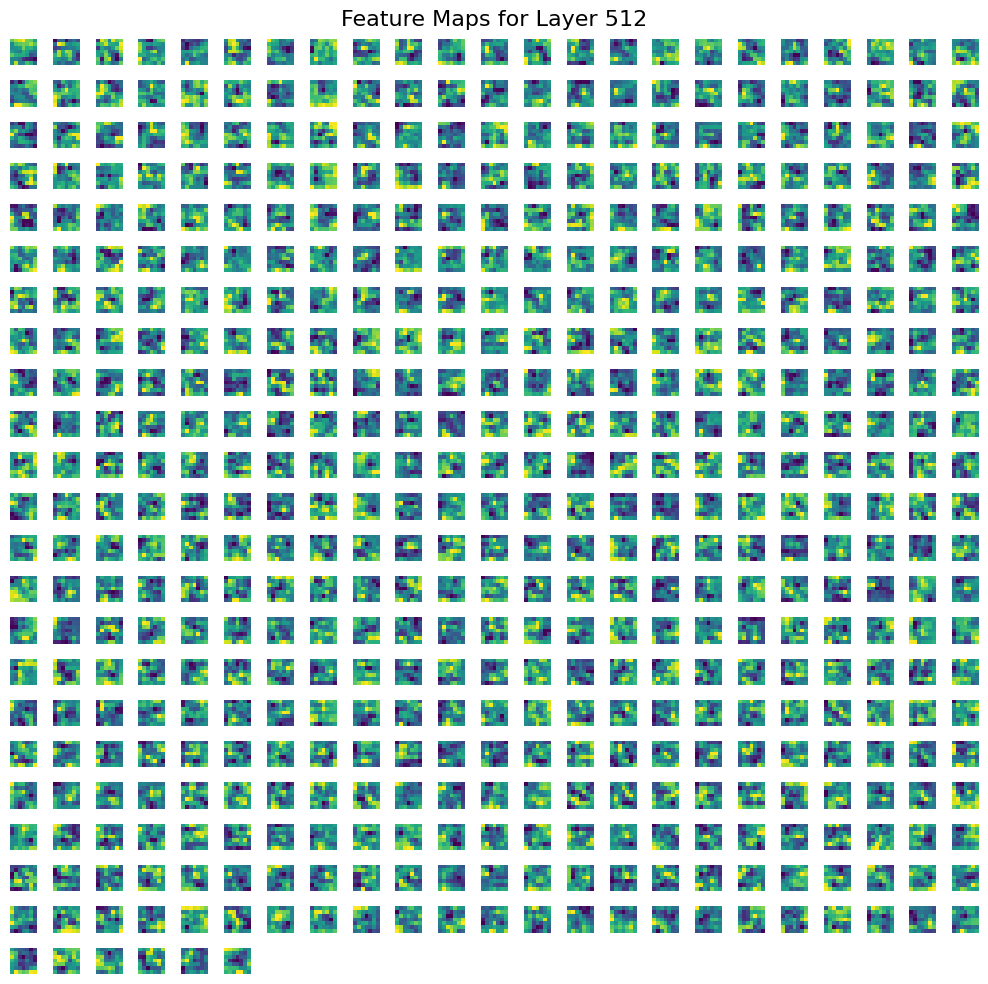

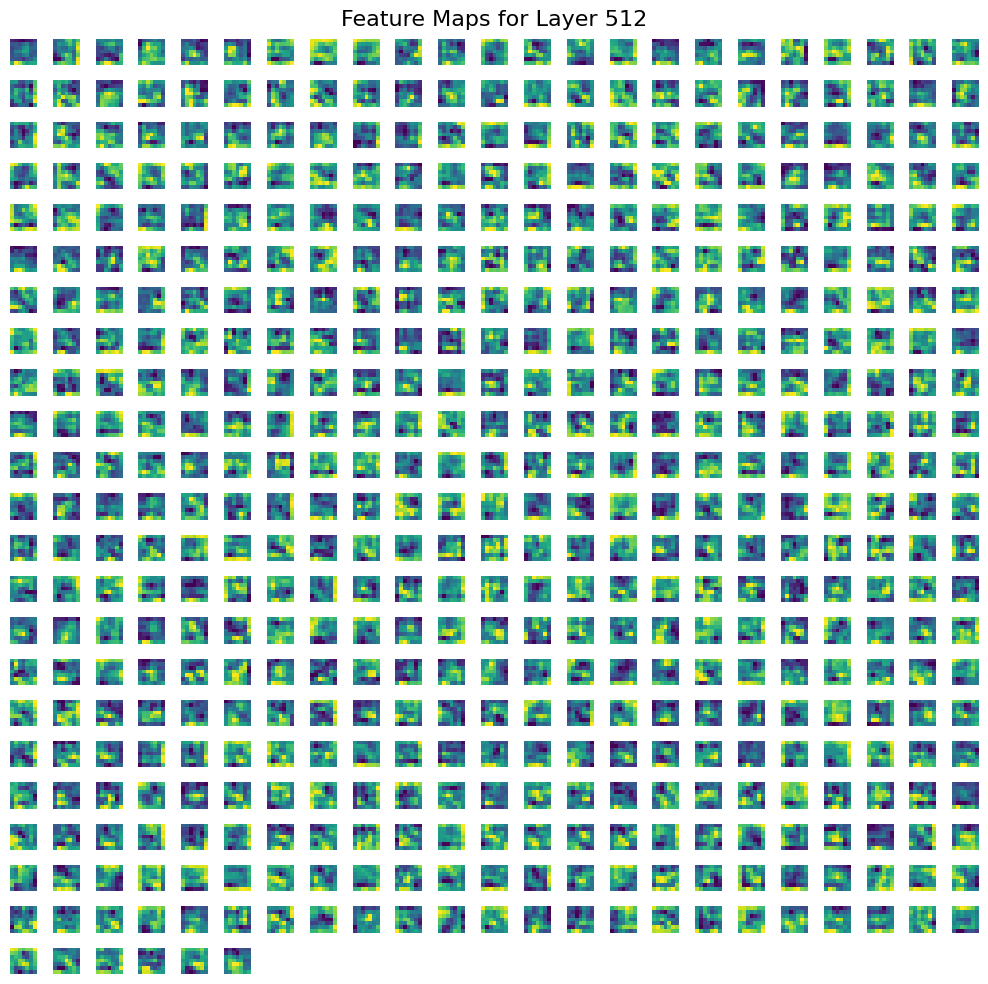

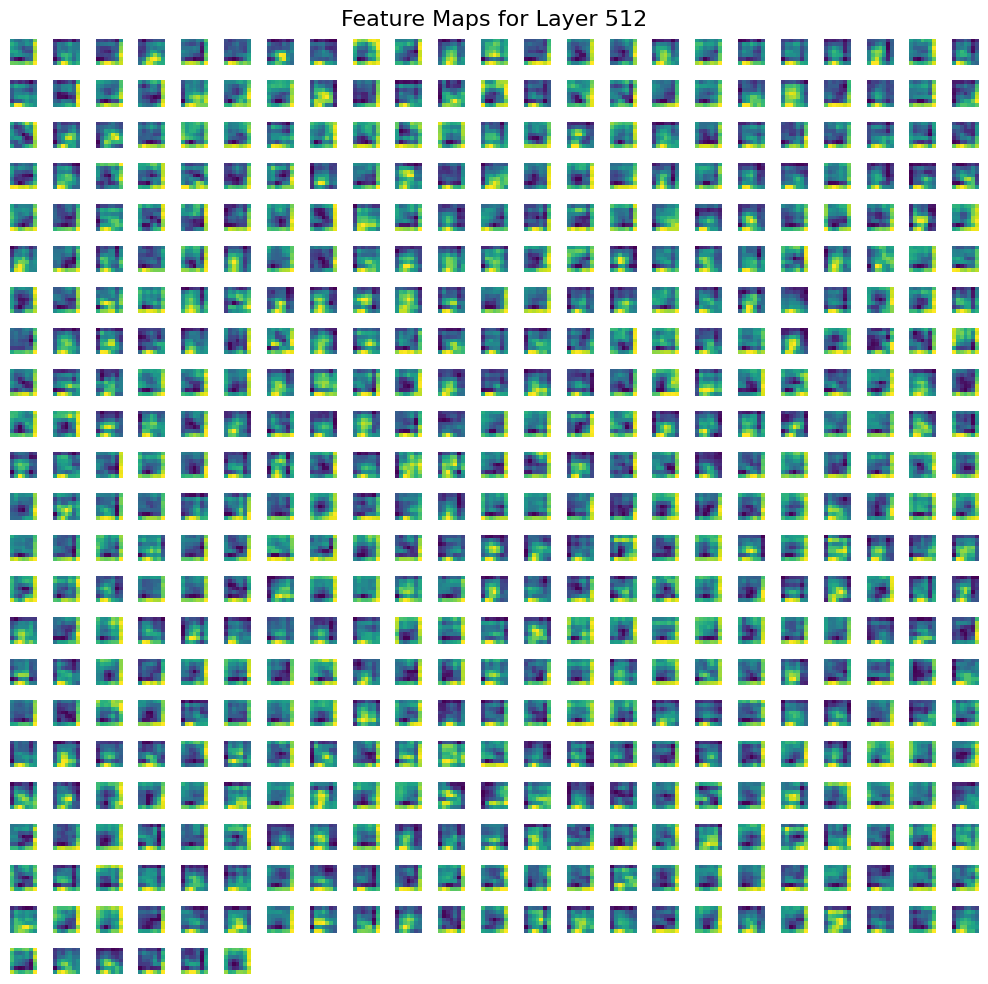

In [35]:

layer_names = []

for i, layer in enumerate(model.layers):
  if layer.name[:4] == 'conv':
    first_layer_output =new_output[i]
    num_feature_maps = first_layer_output.shape[-1]
    num_rows = int(np.ceil(np.sqrt(num_feature_maps)))
    num_cols = int(np.ceil(num_feature_maps / num_rows))
    plt.figure(figsize=(10, 10))
    for j in range(num_feature_maps):

      plt.subplot(num_rows, num_cols, j + 1)
      plt.imshow(first_layer_output[0, :, :, j], cmap='viridis')
      plt.axis('off')
    plt.suptitle(f'Feature Maps for Layer {num_feature_maps}', fontsize=16)
    plt.tight_layout()
    plt.show()


